<a href="https://colab.research.google.com/github/Yagna29/Heart-Disease-Prediction-using-Machine-Learning/blob/main/heartdeisease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of heart disease

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
df['education']=df['education'].fillna(df['education'].mean())
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].mean())
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mean())
df['totChol']=df['totChol'].fillna(df['totChol'].mean())
df['BMI']=df['BMI'].fillna(df['BMI'].mean())
df['heartRate']=df['heartRate'].fillna(df['heartRate'].mean())
df['glucose']=df['glucose'].fillna(df['glucose'].mean())
df['TenYearCHD']=df['TenYearCHD'].fillna(df['TenYearCHD'].mean())
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

##Feature Selction

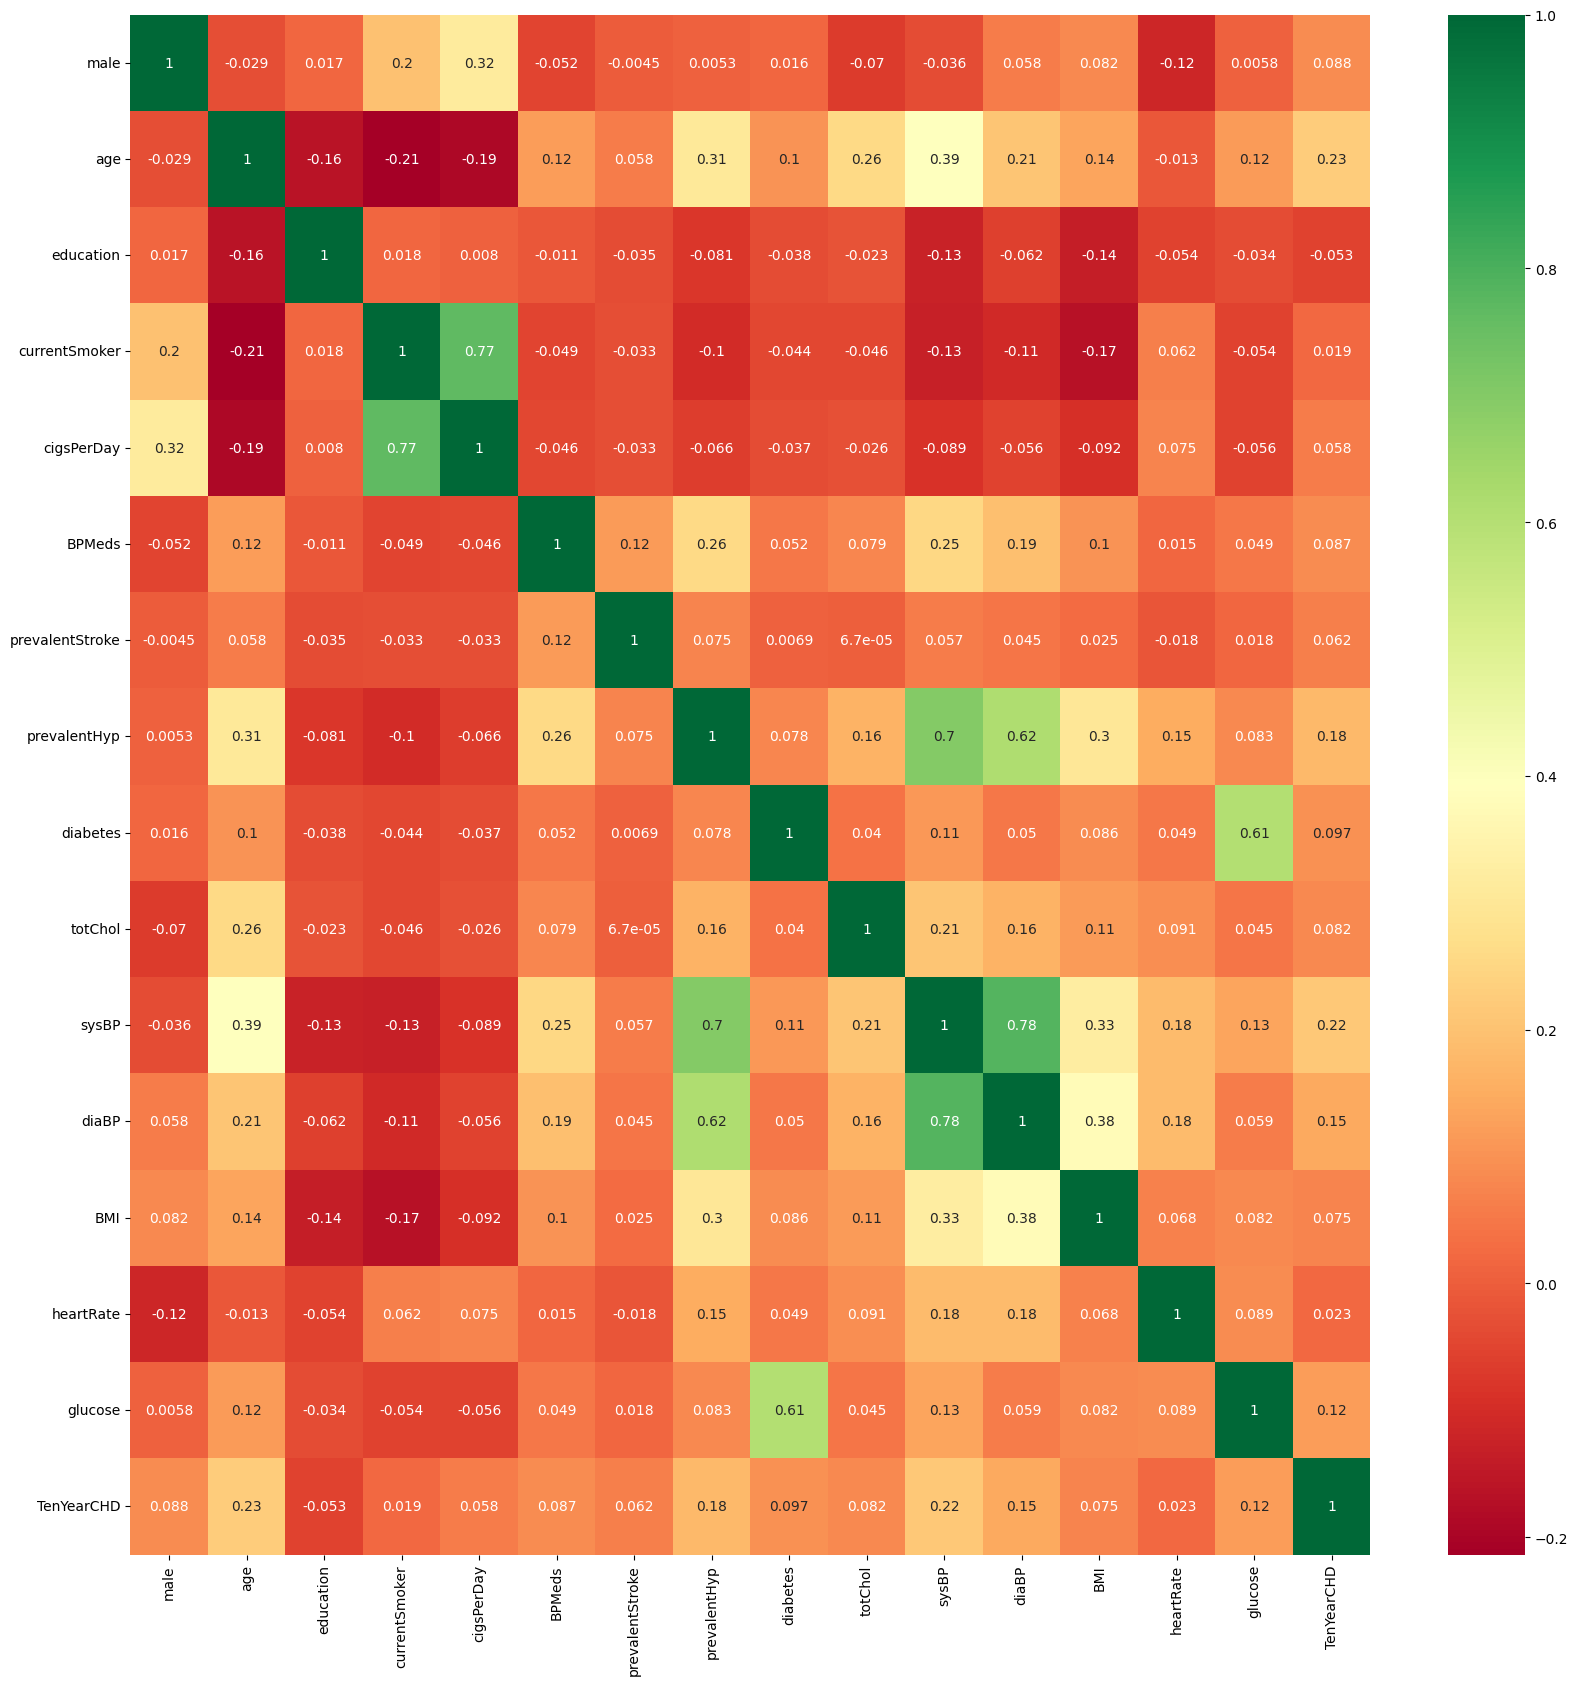

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<Axes: xlabel='TenYearCHD', ylabel='count'>

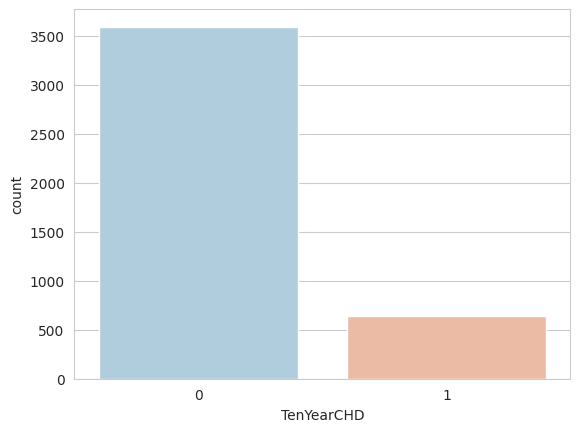

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD',data=df,palette='RdBu_r')

In [ ]:
x=df.iloc[:,:15]
y=df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

##Data Preprocessing


In [ ]:
dataset = pd.get_dummies(df, columns = ['totChol', 'sysBP', 'diaBP', 'BMI', 'glucose'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['male', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
standardScaler = StandardScaler()
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])



In [ ]:
print(df.head())

       male       age  education  currentSmoker  cigsPerDay    BPMeds  \
0  1.153192 -1.234951   2.007088              0   -0.757974 -0.175844   
1 -0.867158 -0.418257   0.020905              0   -0.757974 -0.175844   
2  1.153192 -0.184916  -0.972187              1    0.925835 -0.175844   
3 -0.867158  1.331800   1.013996              1    1.767740 -0.175844   
4 -0.867158 -0.418257   1.013996              1    1.178407 -0.175844   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0        -0.077033     -0.671101 -0.162477    195.0  106.0   70.0  26.97   
1        -0.077033     -0.671101 -0.162477    250.0  121.0   81.0  28.73   
2        -0.077033     -0.671101 -0.162477    245.0  127.5   80.0  25.34   
3        -0.077033      1.490089 -0.162477    225.0  150.0   95.0  28.58   
4        -0.077033     -0.671101 -0.162477    285.0  130.0   84.0  23.10   

   heartRate  glucose  TenYearCHD  
0       80.0     77.0   -0.423305  
1       95.0     76.0   -0.42330

In [ ]:
y = dataset['TenYearCHD']
X = dataset.drop(['TenYearCHD'], axis = 1)

##KNeighborsClassifier

In [ ]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

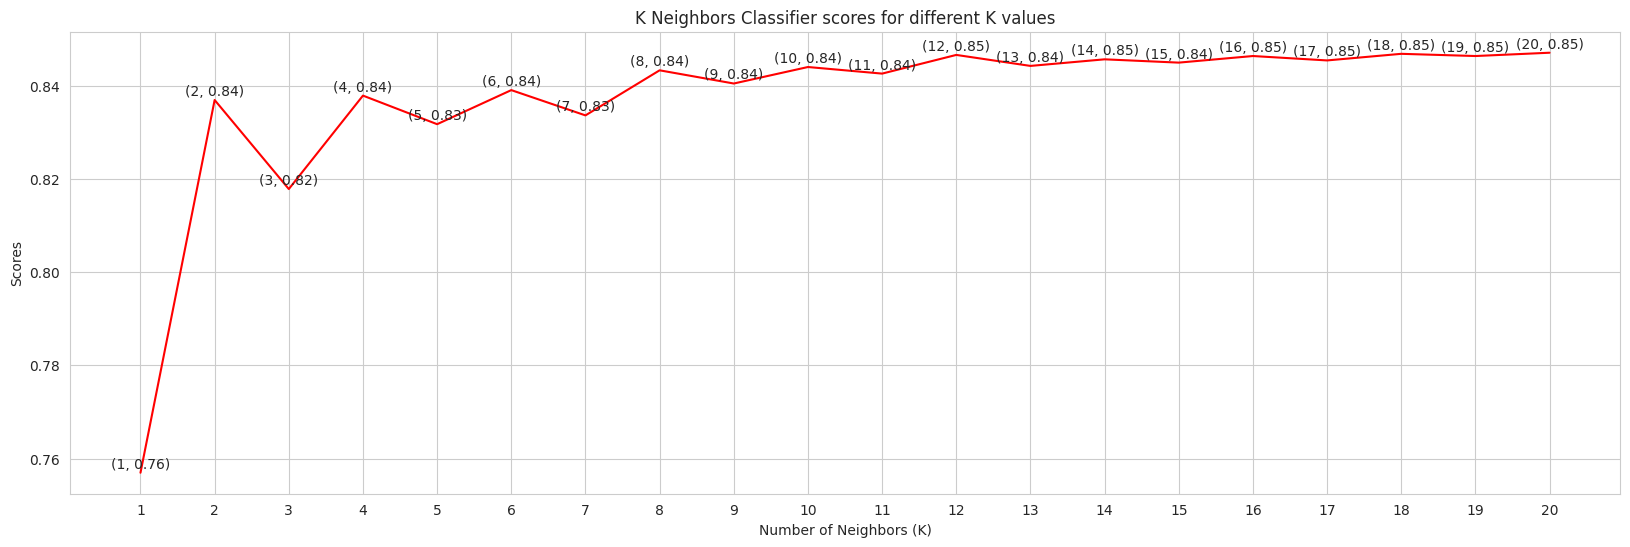

In [ ]:
plt.figure(figsize=(20, 6))

plt.plot([k for k in range(1, 21)], knn_scores, color='red')
for i in range(1, 21):
    plt.text(i, knn_scores[i-1] + 0.001, f"({i}, {knn_scores[i-1]:.2f})", ha='center')
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.grid(True)
plt.show()


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [ ]:
score.mean()

0.8466261876087247